In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897074

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [5]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914474


To summarize: Lasso works by iteratively fitting a model to the data while excluding one of the features. It then checks how well the model reproduces the data, and if the model fit is good enough (with "good enough" determined by  𝜆 ) then the excluded feature is deemed unnecessary and its  𝛽  is set to zero, effectively excluding it from the model. Otherwise, the excluded feature's  𝛽 is set using a combination of the correlation of the feature with the model residuals ( 𝜌𝑗 ) and  𝜆2  and a new iteration begins, using the newly-computed  𝛽  for the previously-excluded feature and excluding a new feature. This continues until the change in  𝛽  is less than a pre-determined threshold.

[0.5630894936716484, 0.4781445089581402, 0.3082496073309635, 0.1914467410568791, 0.053407814340633464, 0.026834134657985894, 0.026834134561415365, 0.026834134351719777, 0.026834131040733955]
[0.5739723157939598, 0.5739723136080856, 0.5739723094974007, 0.5739723066842632, 0.573972303363272, 0.5739722974281252, 0.5739722951952684, 0.5739722903477165, 0.5739722138684666]


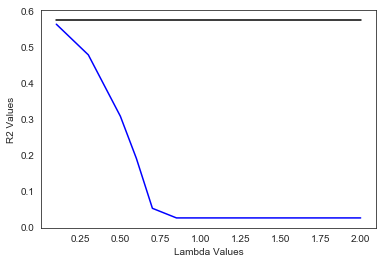

In [14]:
# Your code here
alf = [.1, .3, .5, .60, .7, .85, .9, 1, 2]
r_squr_lass = []
r_squr_ridge = []


for each in alf:
    lassBig = linear_model.Lasso(alpha=each)
    lassBig.fit(X_train2, Y_train)
    r_squr_lass.append(lassBig.score(X_train2, Y_train))
print (r_squr_lass)

for each in alf:
    ridgeBig = linear_model.Ridge(alpha=each)
    ridgeBig.fit(X_train2, Y_train)
    r_squr_ridge.append(ridgeBig.score(X_train2, Y_train))
print (r_squr_ridge)

plt.plot(alf, r_squr_lass, color='blue')
plt.plot(alf, r_squr_ridge, color='black')
plt.xlabel('Lambda Values')
plt.ylabel('R2 Values')
plt.show()

In [ ]:
ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))